#### Project 1

Project description: 
- Find the best repressor for this dataset and train your model on the entire dataset using the best parameters and predict the market price for the test_set.
- submit IPython notebook. Use markdown to provide an inline report for this project.

##### <font color = 'red'> Important note: All the group members should participate in completing this project.  This includes coding, preparing report and testing the models. 

## List of Libraries used for the Project

In [380]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [381]:
data = pd.read_csv('bitcoin_dataset.csv')
test = pd.read_csv('test_set.csv')

## Explore data(Sumamry,statistics,data frame structures

In [382]:
# dataset with columns and row counts
data.shape

(2906, 24)

In [383]:
# dataset with datatypes and their columns
data.dtypes

Date                                                    object
btc_market_price                                       float64
btc_total_bitcoins                                     float64
btc_market_cap                                         float64
btc_trade_volume                                       float64
btc_blocks_size                                        float64
btc_avg_block_size                                     float64
btc_n_orphaned_blocks                                    int64
btc_n_transactions_per_block                           float64
btc_median_confirmation_time                           float64
btc_hash_rate                                          float64
btc_difficulty                                         float64
btc_miners_revenue                                     float64
btc_transaction_fees                                   float64
btc_cost_per_transaction_percent                       float64
btc_cost_per_transaction                               

In [384]:
# first few rows of dataset
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010 0:00,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010 0:00,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010 0:00,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010 0:00,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010 0:00,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [385]:
#summary stats of each columns
data.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2906.000000,2.879000e+03,2.906000e+03,2.885000e+03,2877.000000,2906.000000,2906.000000,2906.000000,2894.000000,2.906000e+03,...,2906.000000,2906.000000,2.906000e+03,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03
mean,839.104218,1.151138e+07,1.344255e+10,7.398381e+07,35505.502848,0.350366,0.364074,671.673651,7.501113,1.244070e+06,...,66.747821,14.639125,1.937861e+05,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08
std,2304.972497,4.200024e+06,3.866150e+10,2.924228e+08,43618.633821,0.353168,0.842259,689.561322,4.974549,2.924141e+06,...,1761.894646,20.536083,2.089146e+05,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.653465,8.485300e+06,5.363081e+07,2.916456e+05,781.000000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,1.181945,4.156470,1.675475e+04,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,2.493564,7.822430,1.304450e+05,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07
75%,594.191164,1.520051e+07,8.075525e+09,2.834038e+07,58293.000000,0.676065,0.000000,1232.995223,10.208333,1.035363e+06,...,5.915591,14.800589,3.603765e+05,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08
max,19498.683330,1.683769e+07,3.265250e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


## Frequncy plots of all the variables and their variation between minimum and maximum

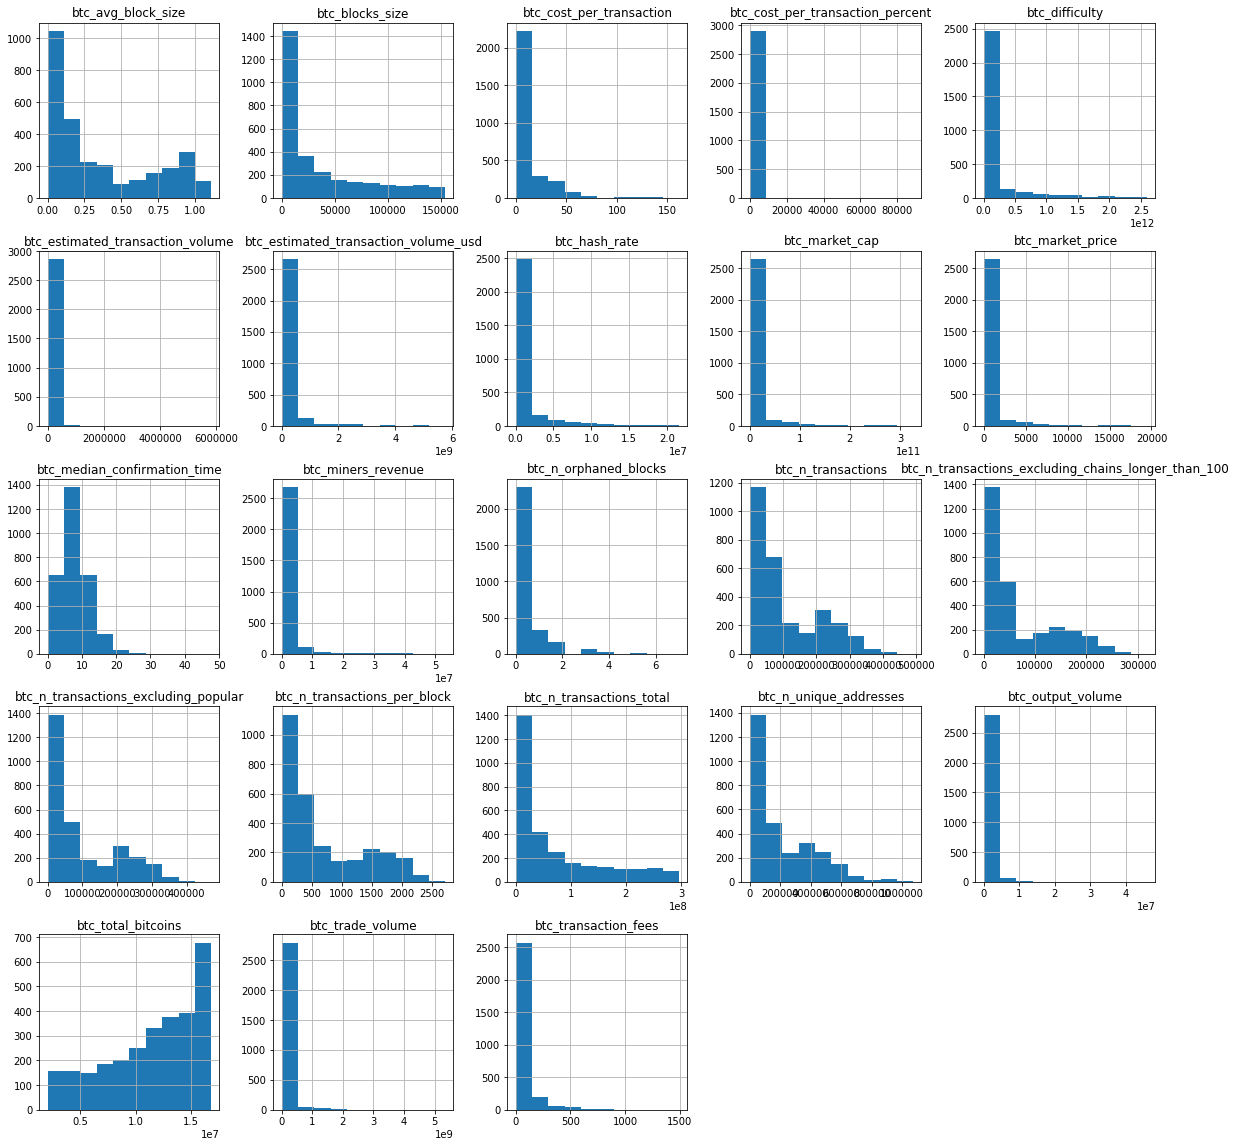

In [386]:
data.hist(sharex=False, sharey=False, figsize=(20, 20), xlabelsize=10, ylabelsize=10)
plt.show()

## Detect Data Skewness and the Distribution of Data with respect to each variable

In [387]:
data.skew()

btc_market_price                                        4.967418
btc_total_bitcoins                                     -0.624831
btc_market_cap                                          4.998385
btc_trade_volume                                        8.220552
btc_blocks_size                                         1.196558
btc_avg_block_size                                      0.717729
btc_n_orphaned_blocks                                   2.797799
btc_n_transactions_per_block                            0.882667
btc_median_confirmation_time                            0.216554
btc_hash_rate                                           3.599421
btc_difficulty                                          3.438582
btc_miners_revenue                                      5.545830
btc_transaction_fees                                    4.149013
btc_cost_per_transaction_percent                       45.343540
btc_cost_per_transaction                                3.306804
btc_n_unique_addresses   

In [388]:
#Identifying the correlation across all the variables
corr = data.corr(method='pearson')

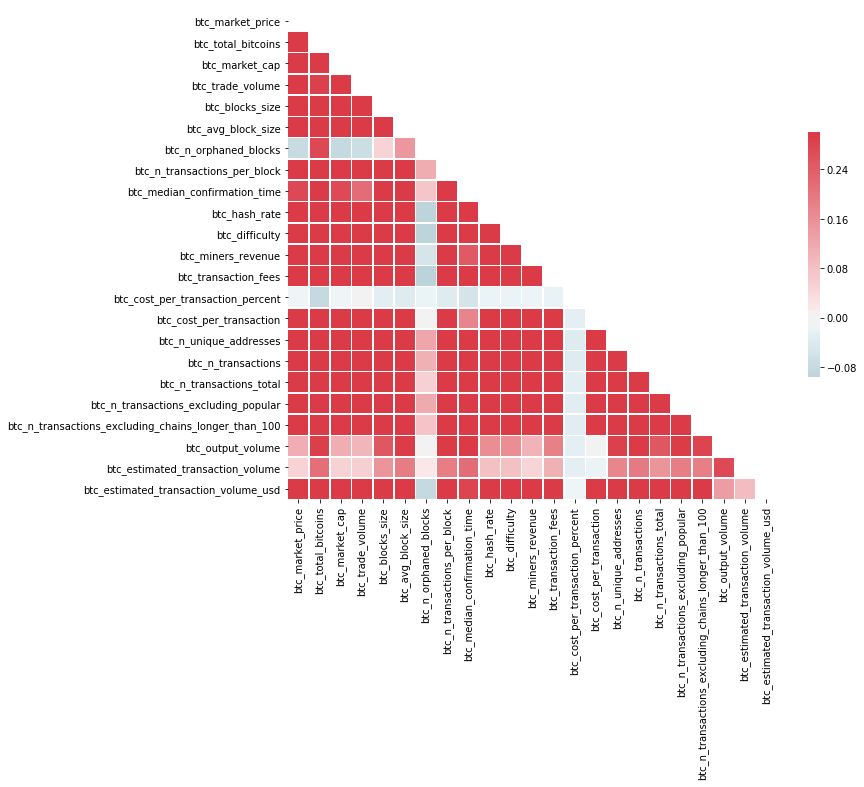

In [389]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [390]:
data_new = data.drop('Date', axis=1)
test_new = test.drop('Date', axis=1)
data_new.head()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,0.000029,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,0.000029,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,0.000023,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,0.000028,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,0.000027,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [391]:
# Identifying the non- correlated variables and removing the correlated variables in order 
#to remove multicollinearity in variables beyond threshold 0f 0.75
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    print(dataset.columns)
data_corr = data_new.drop('btc_market_price', axis=1)
correlation(data_corr, 0.75)

Index(['btc_total_bitcoins', 'btc_market_cap', 'btc_n_orphaned_blocks',
       'btc_median_confirmation_time', 'btc_cost_per_transaction_percent',
       'btc_output_volume', 'btc_estimated_transaction_volume'],
      dtype='object')


## Missing Data Imputation and Scaling

In [397]:
data_new=data_new.fillna(method='ffill')

X = data_new.drop(['btc_market_price'],axis=1)
y = data_new['btc_market_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
np.all(np.isfinite(X))
np.all(np.isnan(y))

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
test_new_scaled = scaler.fit_transform(test_new)

## Machine Learning Models

###### We are using 10-fold cross validation for all the models with default parameters. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

###### Cross Validation without Scaling

In [398]:
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [399]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('SVR', SVR()))

In [400]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: -31063.085745 (13150.695937)
LR: -224.269666 (41.279746)
LASSO: -328.945184 (52.482984)
RIDGE: -224.249164 (41.337875)
SVR: -5454348.087768 (1322490.725659)


###### KNN Regression
Best K-value from the model is 1

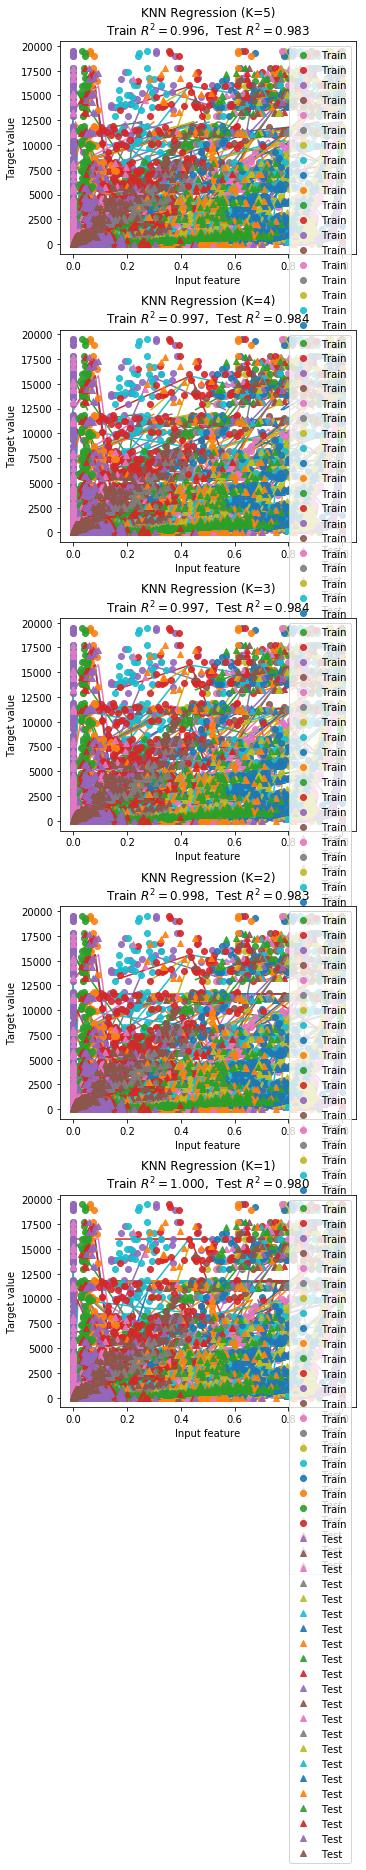

In [410]:
# plot k-NN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))


for thisaxis, K in zip(subaxes, [5, 4, 3, 2, 1]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train_scaled, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train_scaled, y_train)
    test_score = knnreg.score(X_test_scaled, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train_scaled, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test_scaled, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

#### Linear Regression Model

Inferences:

#Looking at the p-values we can infer that almost all the values are significant except btc_trade_volume,btc_cost_per_transaction_percent,btc_output_volume,btc_estimated_transaction_volume

In [412]:
#Linear Regression
from sklearn.linear_model import LinearRegression
#Regression using Ordinary Least Squares
result = sm.OLS(y_train,X_train_scaled).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       btc_market_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.625e+06
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:50:13   Log-Likelihood:                -8949.8
No. Observations:                2179   AIC:                         1.794e+04
Df Residuals:                    2157   BIC:                         1.807e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -66.3152      2.536    -26.147      0.000     -71.289     -61.341
x2          1.879e+04     44.522    422.118      0.000    1.87e+04    1.89e+04
x3            12.0109     13.606      0.883      0.377     -14.671      38.693
x4         -3181.0502    101.461    -31.352      0.000   -3380.022   -2982.079
x5            22.9427      7.259      3.161      0.002       8.707      37.178
x6            -5.4542      3.004     -1.815      0.070     -11.346       0.438
x7           -44.2991      9.244     -4.792      0.000     -62.427     -26.171
x8            28.1357      4.941      5.695      0.000      18.446      37.825
x9          -503.7504     28.474    -17.692      0.000    -559.590    -447.911
x10          215.3588     32.585      6.609      0.000     151.458     279.260
x11          309.0166     47.426      6.516      0.000     216.011     402.022
x12         -265.1996     11.040    -24.022      0.000    -286.850    -243.549
x13            1.2483     13.811      0.090      0.928     -25.836      28.333
x14          434.3109      8.811     49.292      0.000     417.032     451.590
x15          149.6449     15.255      9.810      0.000     119.730     179.560
x16           50.1548     20.647      2.429      0.015       9.666      90.644
x17         3308.9473    101.841     32.491      0.000    3109.231    3508.664
x18          -30.5068     14.400     -2.118      0.034     -58.747      -2.267
x19           24.2840     13.805      1.759      0.079      -2.788      51.356
x20            4.9524      6.257      0.792      0.429      -7.317      17.222
x21            1.8121      7.019      0.258      0.796     -11.952      15.576
x22          129.9344     16.022      8.110      0.000      98.514     161.355
==============================================================================
Omnibus:                      414.708   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10893.464
Skew:                           0.102   Prob(JB):                         0.00
Kurtosis:                      13.952   Cond. No.                         552.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

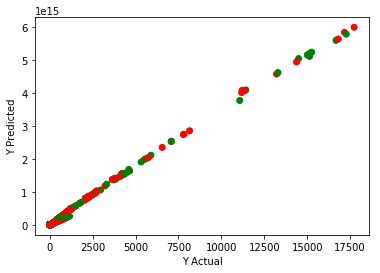

In [413]:
reg = LinearRegression().fit(X_train_scaled, y_train)
#Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_scaled, y_train)
y_pred_validate = linreg.predict(X_test)

import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(y_test,y_pred_validate,color=['red','green'])
plt.show()

In [414]:
#Priniting the coefficient results after rounding up.
print('coef: {}'
     .format(reg.coef_))
print('linear regression intercept: {:.4f}'
     .format(reg.intercept_))
print('linear regression R-squared value training: {:.4f}'
     .format(reg.score(X_train_scaled, y_train)))
print('linear regression R-squared value for test: {:.4f}'
     .format(reg.score(X_test_scaled, y_test)))
##

coef: [ -6.42872979e+01   1.87967419e+04   1.14877998e+01  -3.16302878e+03
   2.21263564e+01  -5.62184215e+00  -4.44771107e+01   2.76629177e+01
  -5.01999852e+02   2.14801040e+02   3.04210405e+02  -2.63274734e+02
   2.36076507e+00   4.34659839e+02   1.49053728e+02   4.87481871e+01
   3.28921011e+03  -2.98098748e+01   2.57993832e+01   4.96813914e+00
   1.89284897e+00   1.30904783e+02]
linear regression intercept: -0.7184
linear regression R-squared value training: 1.0000
linear regression R-squared value for test: 0.9902


###### Ridge Regression

In [415]:
#Ridge regression
#Finding the best alpha
from sklearn.linear_model import Ridge
regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])
model_cv = regr_cv.fit(X_train_scaled, y_train)
model_cv.alpha_ 


0.10000000000000001

In [416]:
#Ridge Regression
ridge = Ridge(alpha=0.1).fit(X_train_scaled, y_train)
print('Bitcoin dataset')
print('coef: {}'
     .format(reg.coef_))
print('ridge regression intercept: {:.4f}'
     .format(reg.intercept_))
print('ridge regression R-squared value training: {:.4f}'
     .format(reg.score(X_train_scaled, y_train)))
print('ridge regression R-squared value for test: {:.4f}'
     .format(reg.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))

Bitcoin dataset
coef: [ -6.42872979e+01   1.87967419e+04   1.14877998e+01  -3.16302878e+03
   2.21263564e+01  -5.62184215e+00  -4.44771107e+01   2.76629177e+01
  -5.01999852e+02   2.14801040e+02   3.04210405e+02  -2.63274734e+02
   2.36076507e+00   4.34659839e+02   1.49053728e+02   4.87481871e+01
   3.28921011e+03  -2.98098748e+01   2.57993832e+01   4.96813914e+00
   1.89284897e+00   1.30904783e+02]
ridge regression intercept: -0.7184
ridge regression R-squared value training: 1.0000
ridge regression R-squared value for test: 0.9902
Number of non-zero features: 22


###### Lasso regression

In [417]:
#Lasso
#Finding the best alpha
p_grid_lasso = {'alpha':[1, 5, 10, 20, 100]}
g_search_lasso = GridSearchCV(linlasso, p_grid_lasso, cv = num_folds)
g_search_lasso.fit(X_train_scaled, y_train)
print('Opted parameter {}'.format(grid_search.best_params_))
print('Opted score {:.4f}'.format(grid_search.best_score_)) 

Opted parameter {'C': 10000, 'epsilon': 10}
Opted score 0.9999


In [418]:
from sklearn.linear_model import Lasso
linlasso = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scaled, y_train)
print('Lasso Regression for BitCoin Dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Lasso Regression for BitCoin Dataset
lasso regression linear model intercept: -1.756769130277121
lasso regression linear model coeff:
[  0.00000000e+00   1.86775611e+04   0.00000000e+00   9.70676180e+01
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   5.42242551e+02   0.00000000e+00   0.00000000e+00
   4.25003897e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00]
Non-zero features: 4
R-squared score (training): 1.000
R-squared score (test): 0.990

Features with non-zero weight (sorted by absolute magnitude):
	btc_market_cap, 18677.561
	btc_cost_per_transaction, 542.243
	btc_blocks_size, 97.068
	btc_n_transactions_total, 4.250


###### Polynomial Regression

In [419]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train_scaled)
lr = LinearRegression()
lr.fit(X_train_scaled,y_train)
lr.predict(X_test_scaled)
print('Training score: {:.4f}'.format(lr.score(X_train_scaled,y_train)))
print('Testing score: {:.4f}'.format(lr.score(X_test_scaled,y_test)))

Training score: 1.0000
Testing score: 0.9902


In [420]:
#Priniting the coefficient results after rounding up.
print('coef: {}'
     .format(lr.coef_))
print('poly regression intercept: {:.4f}'
     .format(lr.intercept_))
print('poly regression R-squared value training: {:.4f}'
     .format(lr.score(X_train_scaled, y_train)))
print('poly regression R-squared value for test: {:.4f}'
     .format(lr.score(X_test_scaled, y_test)))
##

coef: [ -6.42872979e+01   1.87967419e+04   1.14877998e+01  -3.16302878e+03
   2.21263564e+01  -5.62184215e+00  -4.44771107e+01   2.76629177e+01
  -5.01999852e+02   2.14801040e+02   3.04210405e+02  -2.63274734e+02
   2.36076507e+00   4.34659839e+02   1.49053728e+02   4.87481871e+01
   3.28921011e+03  -2.98098748e+01   2.57993832e+01   4.96813914e+00
   1.89284897e+00   1.30904783e+02]
poly regression intercept: -0.7184
poly regression R-squared value training: 1.0000
poly regression R-squared value for test: 0.9902


###### SVM

In [421]:
from sklearn.svm import SVR
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVR(C=10).fit(X, y)
print('Bitcoin dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X, y)))
#print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
#     .format(clf.score(X, y_test)))

Bitcoin dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: -0.07


In [425]:
from sklearn.svm import SVR
#get the best combination of C and epsilon
param_grid = {'C': [0.1, 1, 10, 100],
              'epsilon': [0.01, 0.1, 1, 10]}
grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
param_grid = {'C': [100,500,1000,10000],
              'epsilon': [0.1, 1, 10,20,50]}
grid_search = GridSearchCV(SVR(kernel = 'linear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print('best C: {}'.format(grid_search.best_params_['C']))
print('best epsilon: {}'.format(grid_search.best_params_['epsilon']))
svr_linear = SVR(C=grid_search.best_params_['C'],epsilon=grid_search.best_params_['epsilon'],kernel = 'linear')
svr_linear.fit(X_train_scaled,y_train)
X_test_scaled.shape
X_test_scaled.shape
scores_test = cross_val_score(svr_linear, X_test_scaled, y_test, cv = 2)
print(scores_test)

best C: 100
best epsilon: 0.1
best C: 10000
best epsilon: 10
[ 0.99981375  0.99891484]


###### Choosing the Best Model

From the below cross-validation we can conclude that Linear Regression is the best model with very low standard deviation of 80 compared to other models

In [423]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

pipelines_std = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -224.267354 (41.278581)
ScaledLASSO: -440.220125 (70.143996)
ScaledRidge: -594.550443 (299.958515)
ScaledKNN: -36503.236712 (16554.416111)
ScaledSVR: -5233495.750794 (1305928.275349)
ScaledLR: -224.267354 (41.278581)
ScaledLASSO: -440.220125 (70.143996)
ScaledRidge: -594.550443 (299.958515)
ScaledKNN: -36503.236712 (16554.416111)
ScaledSVR: -5233495.750794 (1305928.275349)


## Prediction of values for the best model

In [427]:
#Linear Regression
from sklearn.linear_model import LinearRegression

y_pred_linreg = reg.predict(test_new_scaled)
#Below are the predicted values of the test dataset
print(y_pred_linreg)

[ 17076.38437114  15776.82076857  17206.37608381  12118.08540639
   -144.32183786   6296.99540945   9809.94772462  11064.20071287
  13367.2893227   11629.54649795  11955.95745744  15423.41669246
  13751.09460006  19401.26189483]
